In [1]:
import pandas as pd
col_list = ["Close"]
AZN_df = pd.read_csv("HC_AZN.csv", usecols=col_list)
JNJ_df = pd.read_csv("HC_JNJ.csv", usecols=col_list)
MRK_df = pd.read_csv("HC_MRK.csv", usecols=col_list)
PFE_df = pd.read_csv("HC_PFE.csv", usecols=col_list)
col_list1 = ["Date"]
date_df = pd.read_csv("HC_PFE.csv", usecols=col_list1)


In [2]:
health_df = pd.concat([date_df, AZN_df, JNJ_df, MRK_df, PFE_df], axis=1)

In [3]:
health_df = health_df.dropna()

In [4]:
cols = []
count = 1
for column in health_df.columns:
    if column == 'Close':
        cols.append(f'Close_{count}')
        count+=1
        continue
    cols.append(column)
health_df.columns = cols

In [5]:
health_df

,Date,Close_1,Close_2,Close_3,Close_4
0,2022-03-21,63.48,175.83,79.09,53.98
1,2022-03-21,63.48,175.84,79.06,54.00
2,2022-03-21,63.48,176.00,79.12,54.05
3,2022-03-21,63.48,176.00,79.06,54.00
4,2022-03-21,63.48,175.83,79.06,54.01
...,...,...,...,...,...
215756,2020-11-06,50.82,122.46,73.21,33.20
215757,2020-11-06,50.82,122.46,73.25,33.21
215758,2020-11-06,50.83,122.36,73.31,33.20
215759,2020-11-06,50.83,122.27,73.30,33.17


In [6]:
health_df = health_df.rename(columns = {"Close_1": "AZN", "Close_2": "JNJ", "Close_3": "MRK", "Close_4": "PFE",})

In [7]:
health_df['Date']= pd.to_datetime(health_df['Date'], format = '%Y-%m-%d')
health_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215761 entries, 0 to 215760
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   Date    215761 non-null  datetime64[ns]
 1   AZN     215761 non-null  float64       
 2   JNJ     215761 non-null  float64       
 3   MRK     215761 non-null  float64       
 4   PFE     215761 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 9.9 MB


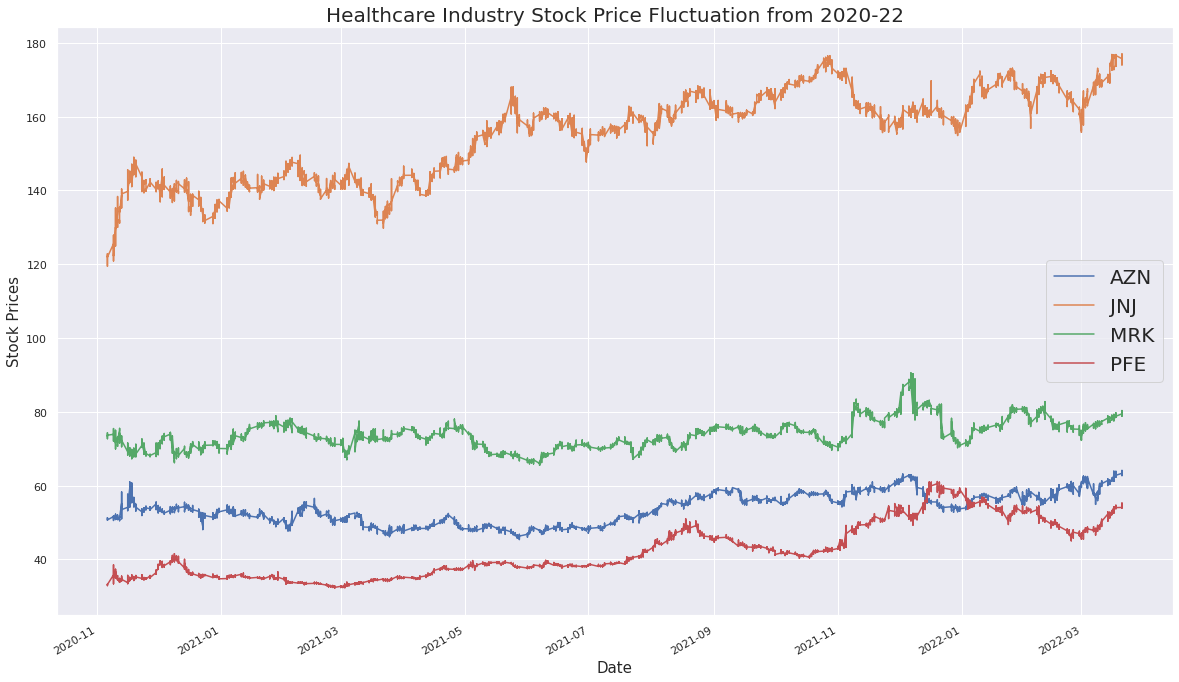

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as md

sns.set(rc={"figure.figsize":(20,12)}) 

health_df.plot(x ='Date', y= ['AZN', 'JNJ', 'MRK', 'PFE'], kind = 'line')

plt.xlabel("Date", fontsize = 15)
plt.ylabel("Stock Prices", fontsize = 15)
plt.title("Healthcare Industry Stock Price Fluctuation from 2020-22", fontsize = 20)
plt.legend(fontsize=20)
plt.show()